In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [ ]:
data = pd.read_excel("Data.xlsx",engine="openpyxl")

In [ ]:
data.head(10)

,x,y,width,height,AspectRatio,Area,Contrast,Target
0,355,1288,34,62,0.548387,2108,255,1
1,401,1288,220,64,3.437500,14080,255,1
2,647,1291,55,63,0.873016,3465,255,1
3,402,1286,34,79,0.430380,2686,254,1
4,447,1283,154,81,1.901235,12474,255,1
5,619,1282,66,80,0.825000,5280,255,1
6,294,1,17,16,1.062500,272,163,0
7,124,60,955,33,28.939394,31515,206,0
8,13,0,69,15,4.600000,1035,179,0
9,88,0,37,15,2.466667,555,174,0


In [ ]:
data.isnull().sum()

,0
x,0
y,0
width,0
height,0
AspectRatio,0
Area,0
Contrast,0
Target,0


In [ ]:
data=data.dropna()

In [ ]:
data.isnull().sum()

,0
x,0
y,0
width,0
height,0
AspectRatio,0
Area,0
Contrast,0
Target,0


In [ ]:
X = data.drop(columns=["Target"])  # Features
y = data["Target"]  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=600, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=600, random_state=42)

In [ ]:
y_pred = rf_model.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

joblib.dump(rf_model, "random_forest_model.pkl")
print("\nModel saved as 'random_forest_model.pkl'")

Confusion Matrix:
[[807  10]
 [ 16 257]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       817
           1       0.96      0.94      0.95       273

    accuracy                           0.98      1090
   macro avg       0.97      0.96      0.97      1090
weighted avg       0.98      0.98      0.98      1090

Accuracy: 0.98

Model saved as 'random_forest_model.pkl'


Feature Importances:
       Feature  Importance
6     Contrast    0.423267
1            y    0.204441
3       height    0.131323
0            x    0.070232
5         Area    0.067252
2        width    0.054119
4  AspectRatio    0.049367


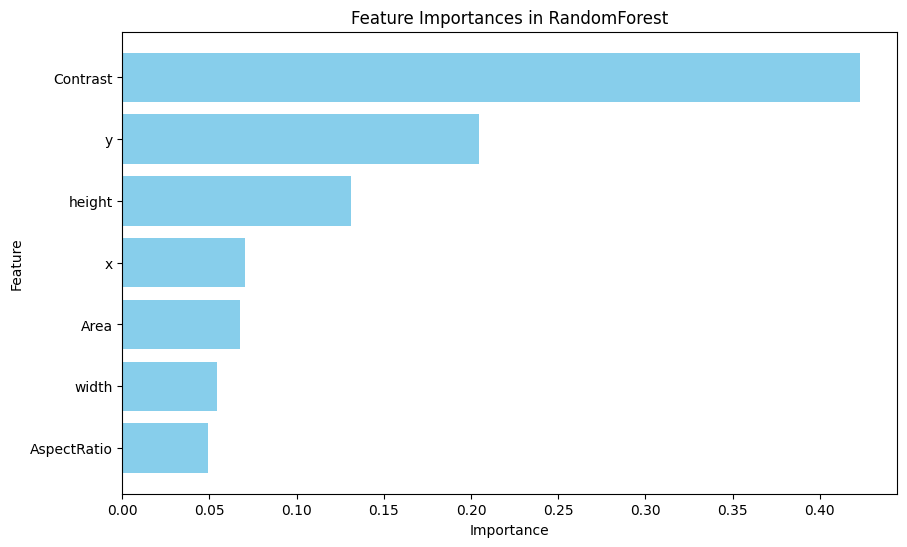

In [ ]:
import matplotlib.pyplot as plt

feature_importances = rf_model.feature_importances_

importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

print("Feature Importances:")
print(importance_df)

plt.figure(figsize=(10, 6))
plt.barh(importance_df["Feature"], importance_df["Importance"], color="skyblue")
plt.gca().invert_yaxis()
plt.title("Feature Importances in RandomForest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [ ]:
scikit-learn --version

NameError: name 'scikit' is not defined